In [1]:
# Let's establish our TensorFlow and Scikit-learn versions
import tensorflow as tf
import sklearn as sk
print("TensorFlow version: %s" % tf.__version__)
print("Scikit-learn version: %s" % sk.__version__)

TensorFlow version: 1.2.1
Scikit-learn version: 0.18.2


In [2]:
# Import dataset from Scikit-learn's datasets module
# http://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
print("Number of instances in the dataset: %d" % len(cancer_data.target))

Number of instances in the dataset: 569


In [3]:
# Split data into train and test data for classification
# from sklearn.cross_validation import train_test_split # for sklearn < v0.18
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(cancer_data['data'], 
                                                          cancer_data['target'])

# Uncomment line below to see effects of using features without normalisation
# """
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
# Fit train data 
data_scaler.fit(in_train)

in_train = data_scaler.transform(in_train)
in_test =  data_scaler.transform(in_test)
# Uncomment line below to see effects of using features without normalisation
# """

In [4]:
from sklearn import metrics
import tensorflow as tf
# ------------------------------------------
# TensorFlow Implementation
# ------------------------------------------
# Building a 3-layer DNN with x units each.
units = 10  # Increase this to see if performance goes down
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(in_train)
classifier_tf = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                               hidden_units=[units, units, units], 
                                               n_classes=2)
classifier_tf.fit(in_train, out_train, steps=500)
predictions = list(classifier_tf.predict_classes(in_test, as_iterable=True))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_model_dir': '/var/folders/j5/y2jlvwvx20lf3pxm6nj6fg5r4qr_6g/T/tmp319e58z2', '_save_checkpoints_secs': 600, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1178aa358>, '_is_chief': True, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_tf_random_seed': None, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_task_type': None, '_session_config': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instruct

In [5]:
# Evaluate the prediction accuracy
score = metrics.accuracy_score(out_test, predictions)
print('Prediction Accuracy: {0:f}'.format(score))

Prediction Accuracy: 0.965035


In [6]:
report = metrics.classification_report(out_test, predictions, 
                                       target_names=cancer_data.target_names)
print(report)

             precision    recall  f1-score   support

  malignant       0.96      0.93      0.95        46
     benign       0.97      0.98      0.97        97

avg / total       0.96      0.97      0.96       143



In [7]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
# Method source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[43  3]
 [ 2 95]]


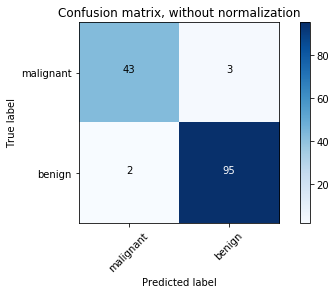

In [8]:
# Plotting the confusion matrix using matplotlib
%matplotlib inline
confusion = metrics.confusion_matrix(out_test, predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=cancer_data.target_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.93478261  0.06521739]
 [ 0.02061856  0.97938144]]


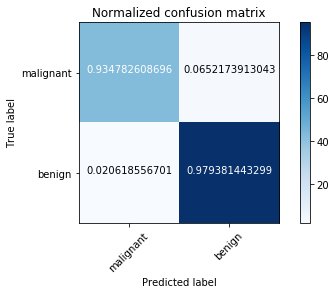

In [9]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=cancer_data.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()